# Xenium Breast Cancer Sample Cell Typing

02AUG23

1) use file created using Bento (shapes included) + QC/PCs included 
2) clustering/cell type defn may be obscured by inclusion of 541-313 = 228 non coding?

03AUG23

1) Updated b/c 313 gene inclusion generated empty NaN's that `dc.run_orc()` couldn't handle.

09SEPT23
1) Run and segregate CD4 v CD8

12JAN24

1) decide figure crops

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import geopandas
import bento as bt
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

/home/ckmah/mambaforge/envs/bento-manuscript/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# data directory /home/avpong/projects/xenium_breast_cancer/data/Xenium_FFPE_shapes_QC_PCA.h5ad
datadir = "/home/ckmah/d/bento-manuscript/data/janesick2023/"
adata = bt.io.read_h5ad(f"{datadir}/xenium_breast_final_celltype_update.h5ad")
adata

AnnData object with n_obs × n_vars = 160281 × 541
    obs: 'cell_shape', 'nucleus_shape', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden_res0_2', 'leiden_res0_5', 'leiden_res0_8', 'leiden_res1', 'cell_area', 'nucleus_area', 'cell_nuc_ratio', 'cell_type_ref'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'cell_type_ref_colors', 'dendrogram_cell_type_ref', 'leiden', 'leiden_res0_2_colors', 'leiden_res0_5_colors', 'leiden_res0_8_colors', 'leiden_res0_8_nhood_enrichment', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'points', 'rank_genes_groups', 'spatial_neighbors', 'umap', 'wilcoxon'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectiviti

In [ ]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden_res0_2",
        "leiden_res0_5",
        "leiden_res0_8",
        "leiden_res1",
    ],
    wspace=0.1,
    ncols=2,
)

### Plot spatial map

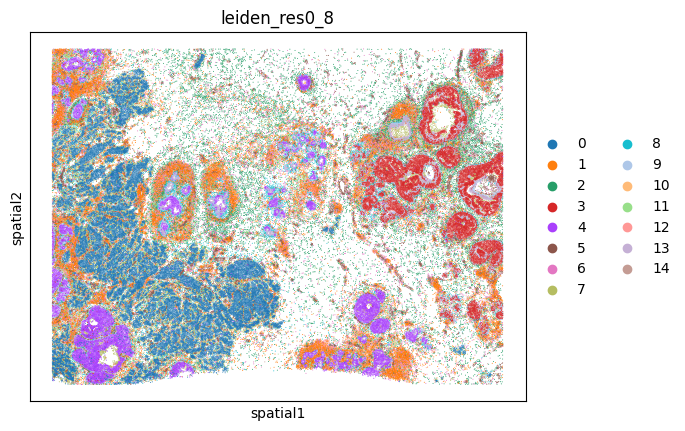

In [3]:
sc.pl.embedding(adata, basis="spatial", color=["leiden_res0_8"], wspace=0.2, size=2)

In [ ]:
## Does not run with scanpy.pl.embedding, requires squipy.pl.spatial_scatter
# fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex="all", sharey="all")
# plt.subplots_adjust(hspace=0.3, wspace=0.1)
# fig.suptitle("Per cluster distribution", fontsize=18, y=0.95)
# clusters = adata.obs["leiden_res0_8"].sort_values().unique()

# for cluster, ax in zip(clusters, axs.ravel()):
#     sc.pl.embedding(
#         adata,
#         basis="spatial",
#         color="leiden_res0_8",
#         groups=cluster,
#         wspace=0.2,
#         title="Cluster " + cluster,
#         ax=ax,
#     )

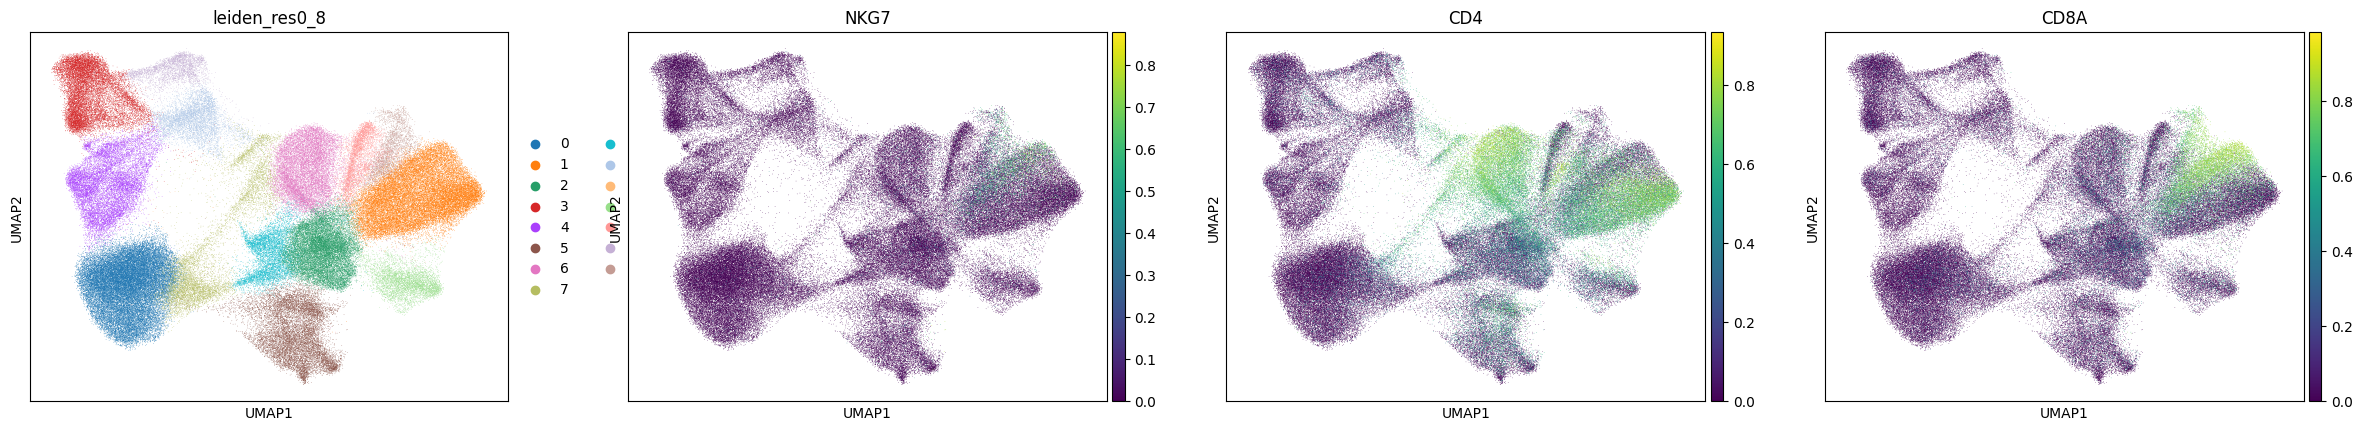

In [19]:
sc.pl.umap(adata, color=["leiden_res0_8", "NKG7", "CD4", "CD8A"])

### View from leiden 0.8

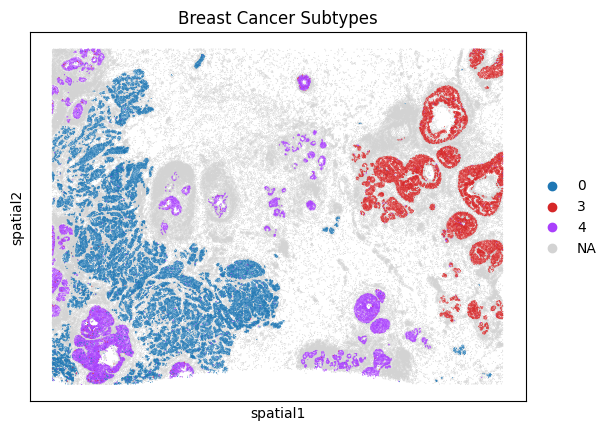

In [5]:
sc.pl.embedding(
    adata,
    basis="spatial",
    color="leiden_res0_8",
    groups=["0", "3", "4"],
    wspace=0.4,
    size=2,
    title="Breast Cancer Subtypes",
)

In [6]:
#  sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, "leiden_res0_8", method="wilcoxon", key_added="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, ncols=3, key="wilcoxon")

KeyError: 'base'

### View from leiden 1.0

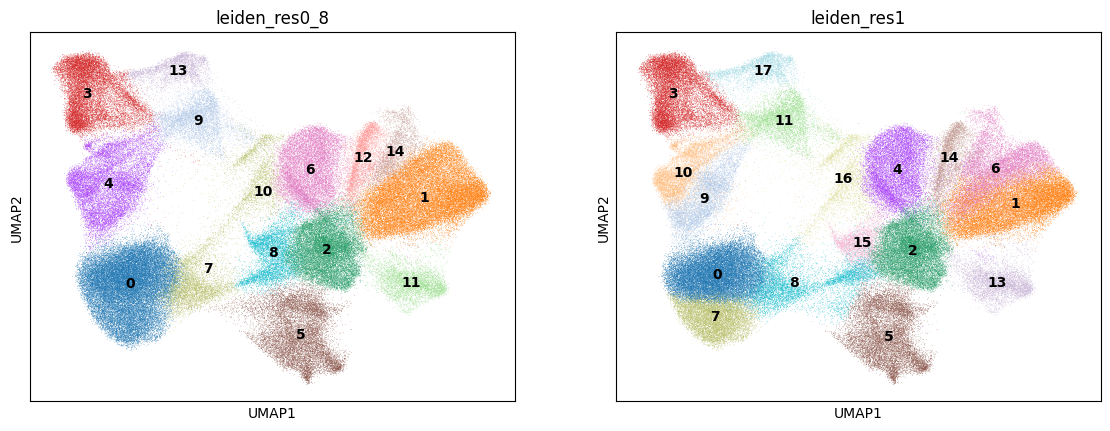

In [24]:
sc.pl.umap(
    adata,
    color=["leiden_res0_8", "leiden_res1"],
    wspace=0.1,
    ncols=2,
    legend_loc="on data",
)

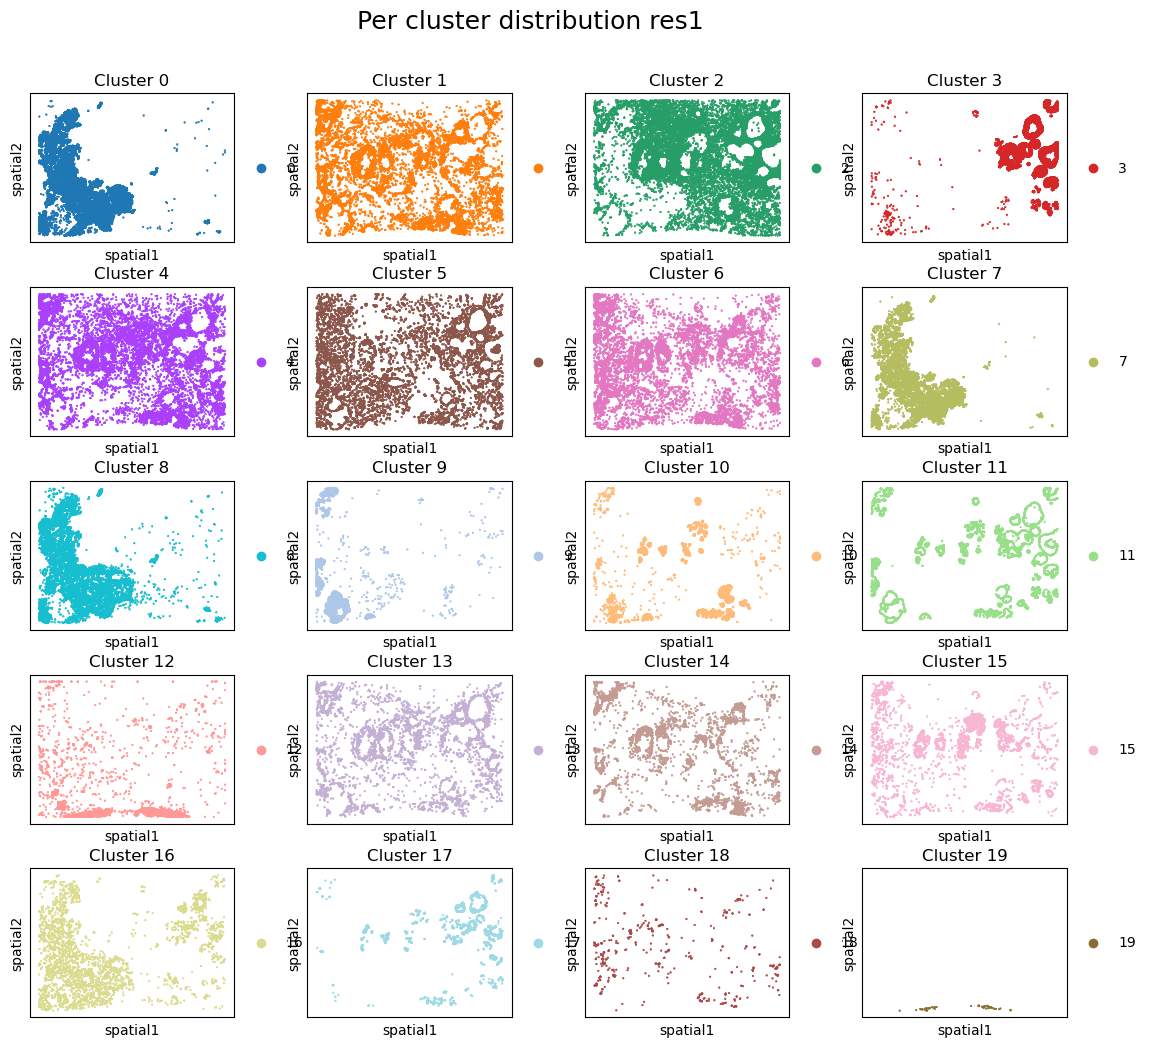

In [10]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(14, 12), sharex='all', sharey='all')
plt.subplots_adjust(hspace=0.3, wspace=0.1)
fig.suptitle("Per cluster distribution res1", fontsize=18, y = .95)
clusters = adata.obs['leiden_res1'].sort_values().unique()

for cluster, ax in zip(clusters, axs.ravel()):

    sq.pl.spatial_scatter(
        adata,
        library_id="spatial",
        shape=None,
        color="leiden_res1",
        groups=cluster,
        wspace=0.2,
        title='Cluster ' + cluster,
        axis_label=None,
        ax=ax,
    )

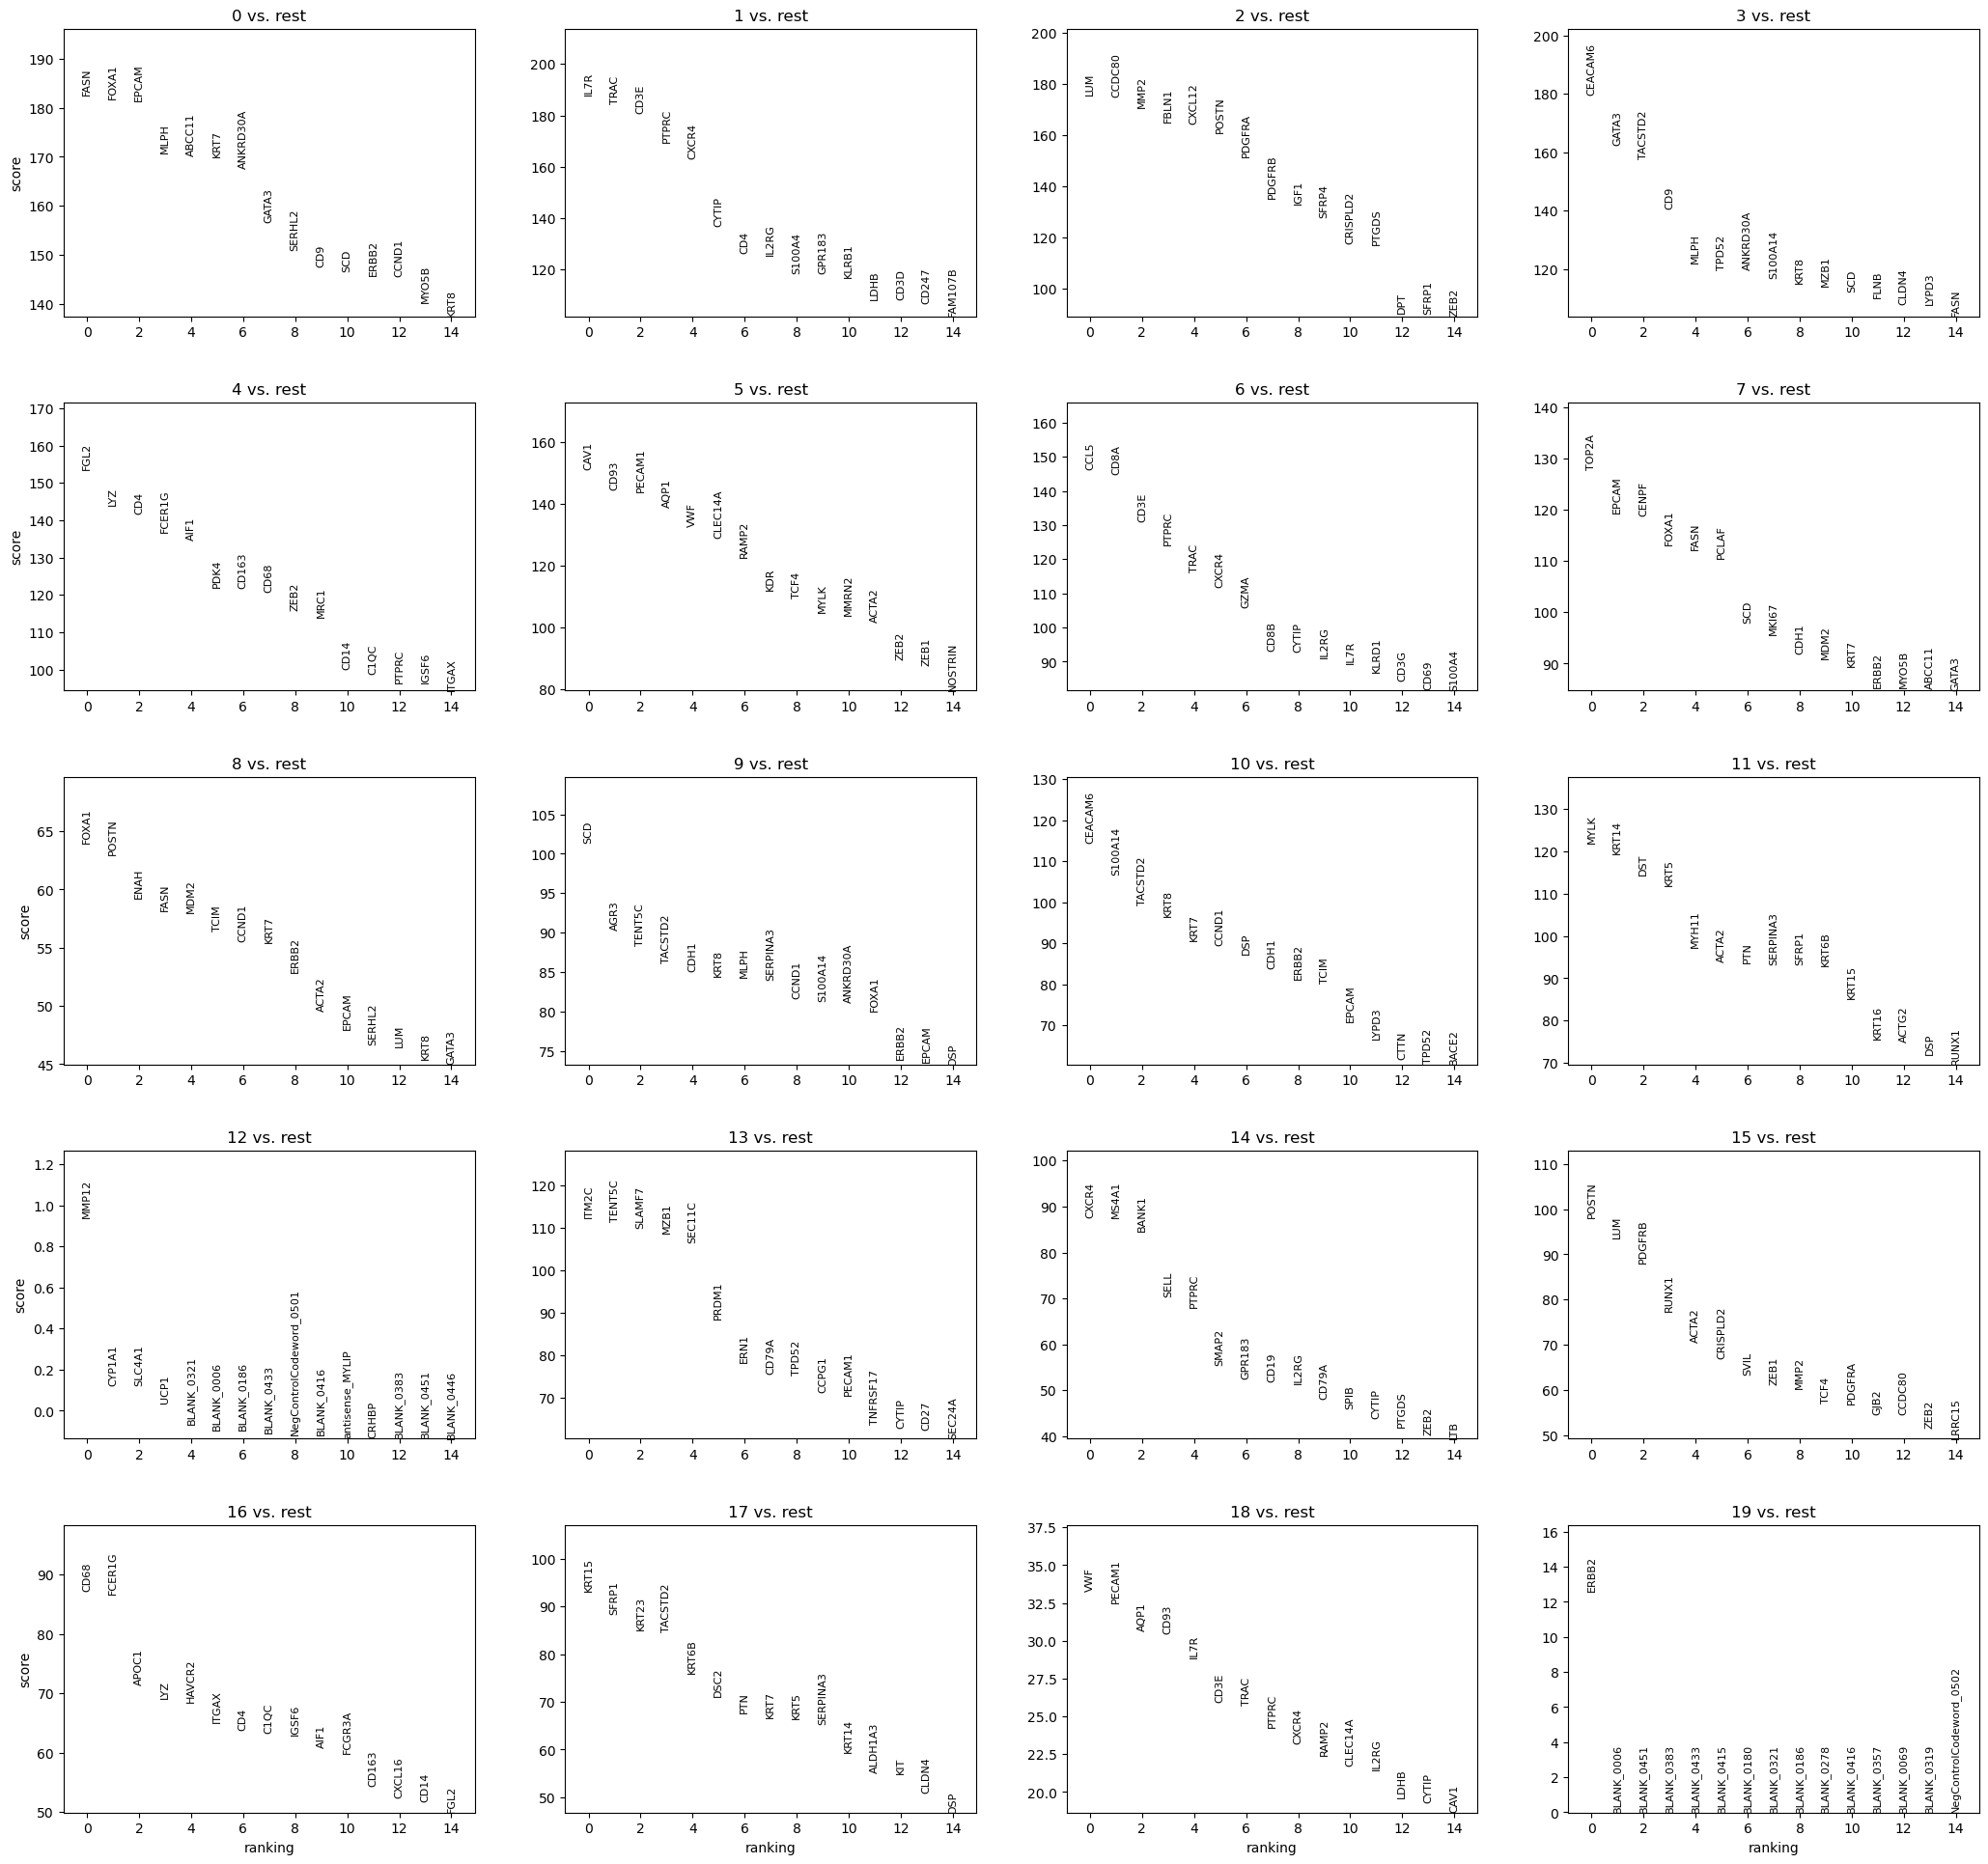

In [11]:
# sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'leiden_res1', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, ncols=4, key="wilcoxon")

In [12]:
adata

AnnData object with n_obs × n_vars = 166520 × 541
    obs: 'cell_shape', 'nucleus_shape', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden_res0_2', 'leiden_res0_5', 'leiden_res0_8', 'leiden_res1', 'cell_area', 'nucleus_area', 'cell_nuc_ratio'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_res0_2_colors', 'leiden_res0_5_colors', 'leiden_res0_8_colors', 'leiden_res0_8_nhood_enrichment', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'points', 'spatial_neighbors', 'umap', 'wilcoxon'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

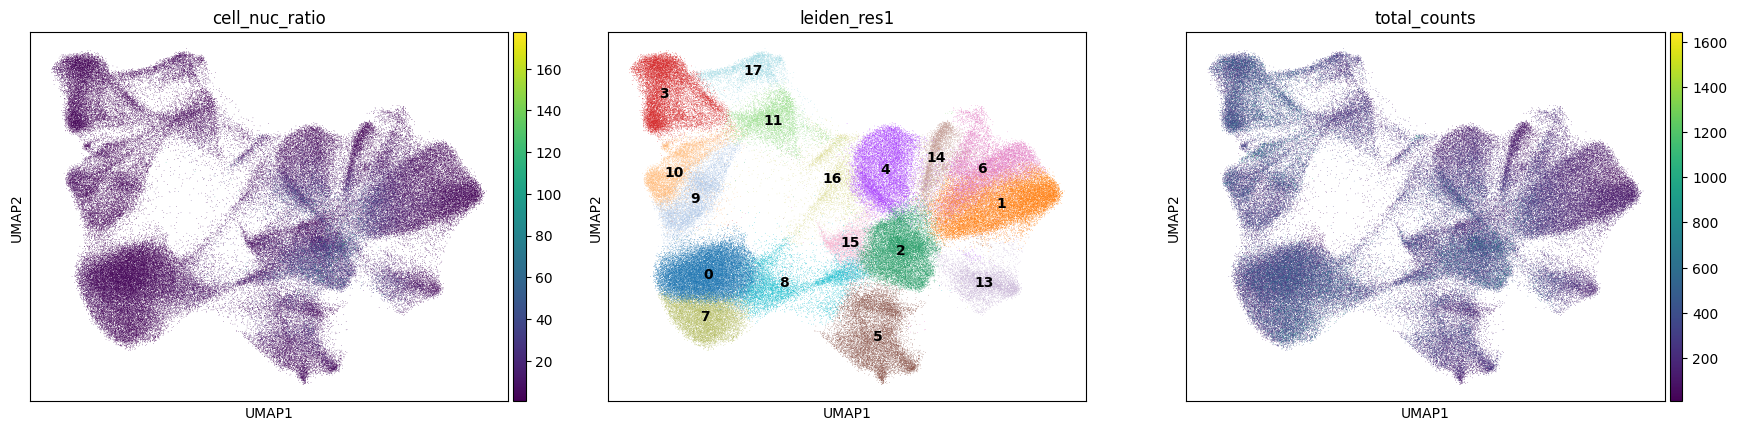

In [25]:
sc.pl.umap(
    adata,
    color=["cell_nuc_ratio", "leiden_res1", "total_counts"],
    wspace=0.1,
    ncols=3,
    legend_loc="on data",
)

## Final assignments leiden res1


#### 12JAN24 This represents the most recent cell type assignments that are truest to the original paper.

* cluster 0 : invasive tumor
* cluster 1 : CD4+ T cells
* cluster 2 : fibroblasts
* cluster 3 : DCIS 1
* cluster 4 : macrophages general
* cluster 5 : endothelial cells
* cluster 6 : CD8+ T cells
* cluster 7 : invasive tumor
* cluster 8 : invasive tumor
* cluster 9 : DCIS 2
* cluster 10 : DCIS 2
* cluster 11 : breast myoepithelial cells ACTA2+
* cluster 12 : low QC
* cluster 13 : plasma cells - on the basis of CD19- CD27+ SLAMF7+
* cluster 14 : B cells
* cluster 15 : stromal general
* cluster 16 : TAMs - on the basis of CD68+ APOC1+
* cluster 17 : breast myoepithelial cells KRT15+
* cluster 18 : low QC (too many too assign)
* cluster 19 : low QC


## Draft assignments leiden res 0.8

* cluster 0 : invasive tumor
* cluster 1 : CD4+ t cells
* cluster 2 : fibroblasts
* cluster 3 : DCIS 1
* cluster 4 : DCIS 2
* cluster 5 : endothelial cells
* cluster 6 : macrophages
* cluster 7 : invasive tumor (prolif?)
* cluster 8 : stromal general
* cluster 9 : Breast myoepithelial cells
* cluster 10 : low QC
* cluster 11 : B/DC
* cluster 12 : B/DC
* cluster 13 : general breast tissue
* cluster 14 : CD8+ t cells
* cluster 15 : low QC

## Final assignments leiden res 0.8

upon observing CD8+ t cell cluster dendrogram shunting to breast cancer cells, reassign to generalized CD3+ t cell class

* cluster 0 : invasive tumor
* cluster 1 : CD3+ t cells
* cluster 2 : fibroblasts
* cluster 3 : DCIS 1
* cluster 4 : DCIS 2
* cluster 5 : endothelial cells
* cluster 6 : macrophages
* cluster 7 : invasive tumor (prolif?)
* cluster 8 : stromal general
* cluster 9 : Breast myoepithelial cells
* cluster 10 : low QC
* cluster 11 : B/DC
* cluster 12 : B/DC
* cluster 13 : general breast tissue
* cluster 14 : CD3+ t cells
* cluster 15 : low QC


In [26]:
# res0.8
def cell_typing(value):
    if value == "0":
        return "invasive tumor"
    if value == "1":
        return "CD4+ T cells"
    if value == "2":
        return "fibroblast"
    if value == "3":
        return "DCIS 1"
    if value == "4":
        return "macrophages"
    if value == "5":
        return "Endothelial"
    if value == "6":
        return "CD8+ T cells"
    if value == "7":
        return "invasive tumor"
    if value == "8":
        return "invasive tumor (prolif?)"
    if value == "9":
        return "DCIS 2"
    if value == "10":
        return "DCIS 2"
    if value == "11":
        return "myoepithelial ACTA2+"
    if value == "12":
        return "low QC"
    if value == "13":
        return "plasma cells"
    if value == "14":
        return "B cells"
    if value == "15":
        return "stromal general"
    if value == "16":
        return "TAMs"
    if value == "17":
        return "myoepithelial KRT15+"
    if value == "18":
        return "low QC"
    if value == "19":
        return "low QC"

In [27]:
# run cell typing
adata.obs["cell_type_ref"] = adata.obs["leiden_res1"].map(cell_typing)
adata.obs

cell_shape  \
cell                                                        
1       POLYGON ((817.062 321.087, 816.000 329.375, 81...   
100     POLYGON ((835.975 98.175, 835.550 100.300, 833...   
1000    POLYGON ((145.350 1692.775, 142.375 1695.750, ...   
10000   POLYGON ((5585.562 2519.188, 5577.487 2521.525...   
100000  POLYGON ((3662.650 1367.225, 3659.462 1372.325...   
...                                                   ...   
99995   POLYGON ((3702.175 1362.975, 3694.525 1366.800...   
99996   POLYGON ((3709.825 1365.738, 3707.700 1366.375...   
99997   POLYGON ((3657.975 1360.850, 3651.387 1361.700...   
99998   POLYGON ((3690.062 1366.162, 3683.050 1368.500...   
99999   POLYGON ((3663.075 1366.375, 3662.863 1367.012...   

                                            nucleus_shape  batch  \
cell                                                               
1       POLYGON ((820.250 326.825, 820.037 328.525, 82...      0   
100     POLYGON ((839.375 103.062, 837.250 103.912, 83...      0   
1000    POLYGON ((147.262 1694.688, 144.288 1695.537, ...      0   
10000   POLYGON ((5585.562 2534.062, 5584.712 2534.913...      0   
100000  POLYGON ((3660.950 1374.875, 3660.525 1375.938...      0   
...                                                   ...    ...   
99995   POLYGON ((3702.175 1365.312, 3701.113 1365.738...      0   
99996   POLYGON ((3711.950 1366.800, 3706.850 1369.137...      0   
99997   POLYGON ((3653.087 1368.925, 3652.450 1369.350...      0   
99998   POLYGON ((3693.038 1372.325, 3692.188 1372.750...      0   
99999   POLYGON ((3666.475 1374.025, 3665.625 1375.300...      0   

        n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
cell                                                               
1                      38                 3.663562          99.0   
100                    59                 4.094345         182.0   
1000                   85                 4.454347         286.0   
10000                 138                 4.934474         493.0   
100000                 70                 4.262680         192.0   
...                   ...                      ...           ...   
99995                  64                 4.174387         187.0   
99996                  86                 4.465908         514.0   
99997                 113                 4.736198         279.0   
99998                  89                 4.499810         472.0   
99999                  76                 4.343805         172.0   

        log1p_total_counts  pct_counts_in_top_10_genes  \
cell                                                     
1                 4.605170                   54.545455   
100               5.209486                   47.252747   
1000              5.659482                   42.307692   
10000             6.202536                   33.468560   
100000            5.262690                   42.708333   
...                    ...                         ...   
99995             5.236442                   50.267380   
99996             6.244167                   48.638132   
99997             5.634789                   32.974910   
99998             6.159095                   48.728814   
99999             5.153292                   36.627907   

        pct_counts_in_top_20_genes  pct_counts_in_top_50_genes  \
cell                                                             
1                        78.787879                  100.000000   
100                      68.131868                   95.054945   
1000                     59.790210                   87.762238   
10000                    48.681542                   72.008114   
100000                   60.937500                   89.583333   
...                            ...                         ...   
99995                    70.053476                   92.513369   
99996                    70.428016                   91.634241   
99997                    46.594982                   72.759857   
99

Text(0.5, 1.0, 'Cell type abundances with manual curation')

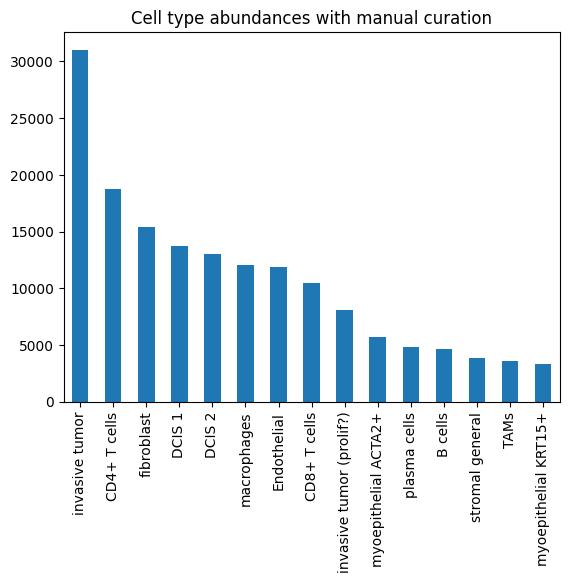

In [28]:
adata.obs["cell_type_ref"].value_counts().plot(kind="bar")
plt.title("Cell type abundances with manual curation")

In [29]:
adata = adata[adata.obs["cell_type_ref"] != "low QC"]
adata.obs["cell_type_ref"].unique()

array(['DCIS 2', 'Endothelial', 'invasive tumor (prolif?)',
       'invasive tumor', 'CD8+ T cells', 'CD4+ T cells', 'fibroblast',
       'macrophages', 'TAMs', 'plasma cells', 'B cells', 'DCIS 1',
       'myoepithelial ACTA2+', 'stromal general', 'myoepithelial KRT15+'],
      dtype=object)

In [30]:
adata.obs["cell_type_ref"] = adata.obs["cell_type_ref"].astype("category")
adata.obs.dtypes

cell_shape                     geometry
nucleus_shape                  geometry
batch                             int64
n_genes_by_counts                 int64
log1p_n_genes_by_counts         float64
total_counts                    float32
log1p_total_counts              float32
pct_counts_in_top_10_genes      float64
pct_counts_in_top_20_genes      float64
pct_counts_in_top_50_genes      float64
pct_counts_in_top_150_genes     float64
leiden_res0_2                  category
leiden_res0_5                  category
leiden_res0_8                  category
leiden_res1                    category
cell_area                       float64
nucleus_area                    float64
cell_nuc_ratio                  float64
cell_type_ref                  category
dtype: object

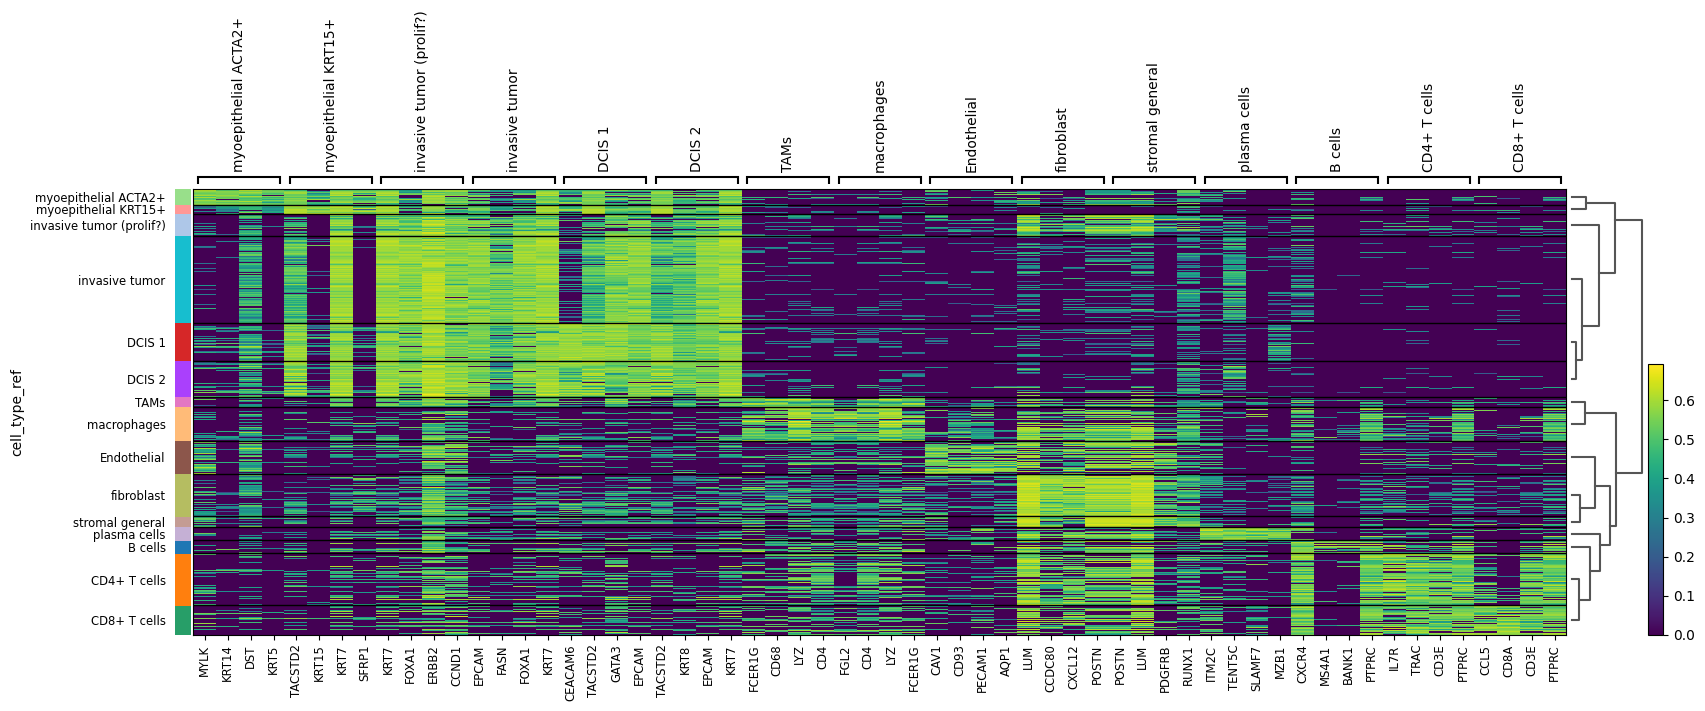

In [31]:
sc.tl.dendrogram(adata, "cell_type_ref")
sc.tl.rank_genes_groups(adata, "cell_type_ref")
sc.pl.rank_genes_groups_heatmap(
    adata, n_genes=4, groupby="cell_type_ref", show_gene_labels=True
)

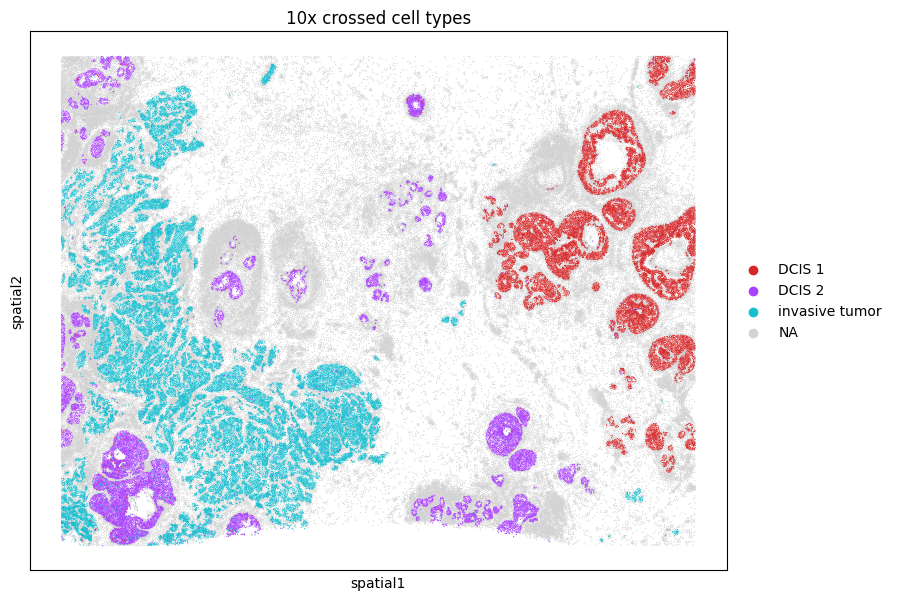

In [33]:
fig, ax = plt.subplots(figsize=(9, 7))
sc.pl.embedding(
    adata,
    basis="spatial",
    color="cell_type_ref",
    groups=["invasive tumor", "DCIS 1", "DCIS 2"],
    wspace=0.4,
    title="10x crossed cell types",
    size=3,
    ax=ax,
)

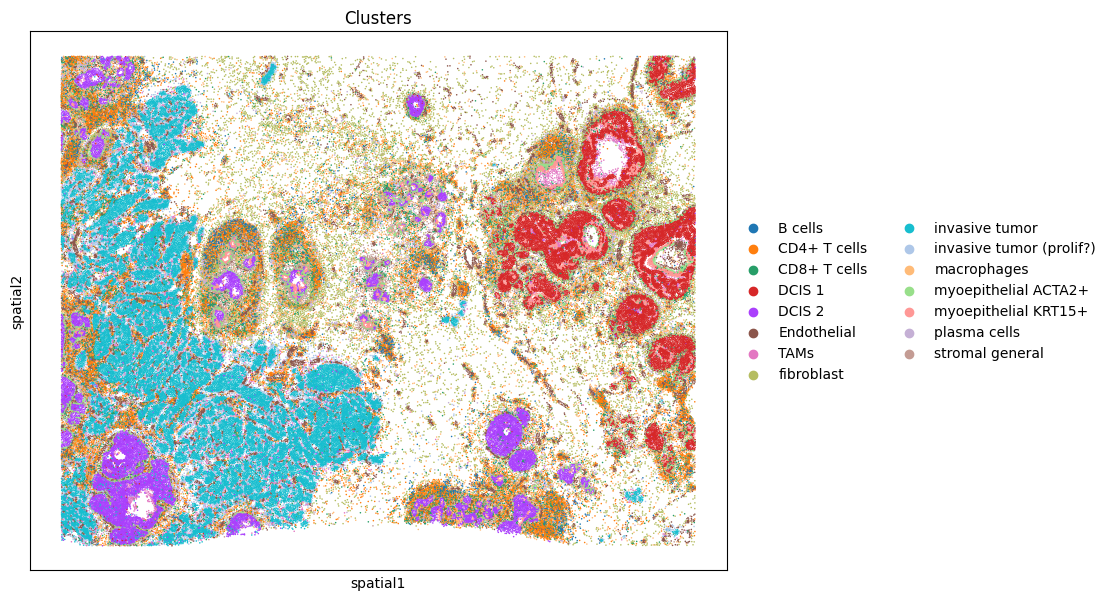

In [39]:
fig, ax = plt.subplots(figsize=(9, 7))
sc.pl.embedding(
    adata,
    basis="spatial",
    color="cell_type_ref",
    wspace=0.4,
    title="Clusters",
    size=5,
    ax=ax,
)

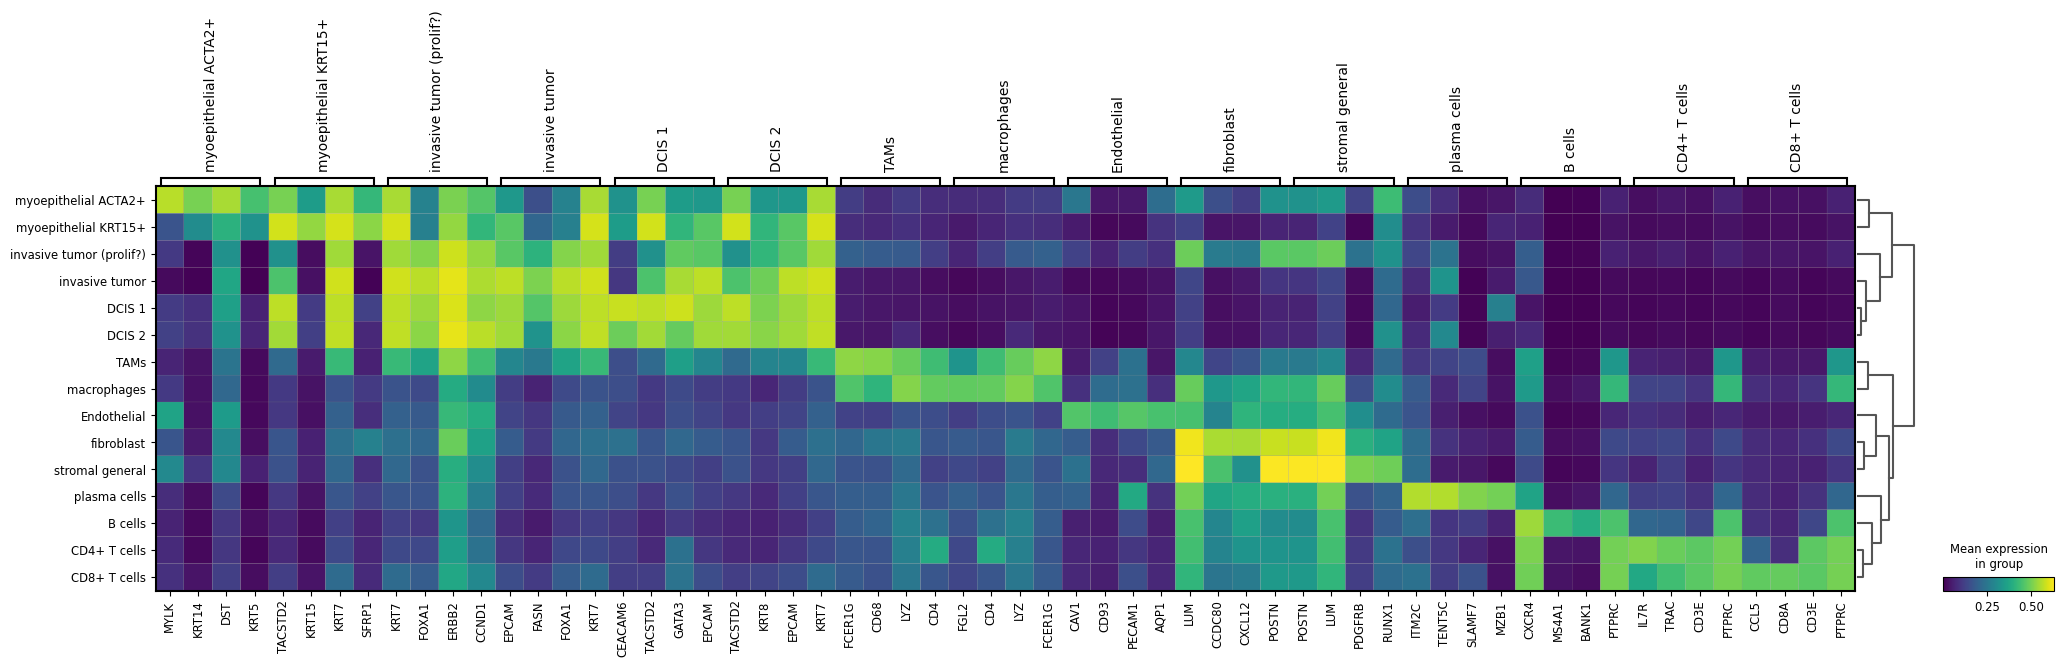

In [37]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=4, groupby="cell_type_ref")

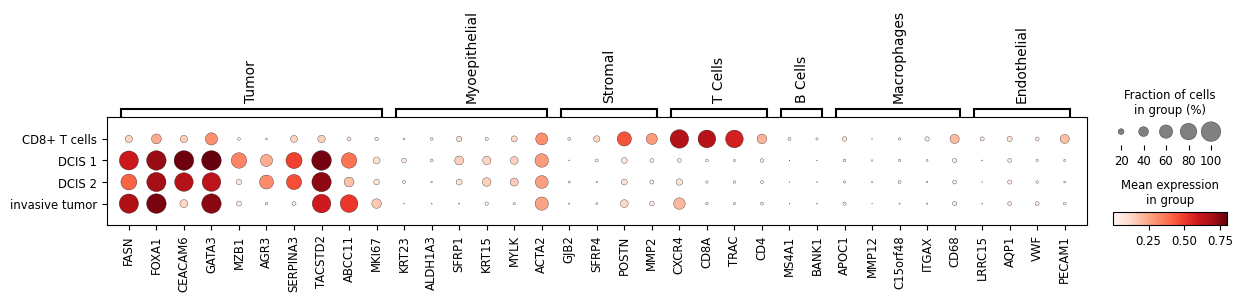

In [7]:
adata_1b = adata[
    adata.obs["cell_type_ref"].isin(
        ["invasive tumor", "DCIS 1", "DCIS 2", "CD8+ T cells"]
    )
]

var_names = {
    "Tumor": [
        "FASN",
        "FOXA1",
        "CEACAM6",
        "GATA3",
        "MZB1",
        "AGR3",
        "SERPINA3",
        "TACSTD2",
        "ABCC11",
        "MKI67",
    ],
    "Myoepithelial": ["KRT23", "ALDH1A3", "SFRP1", "KRT15", "MYLK", "ACTA2"],
    "Stromal": ["GJB2", "SFRP4", "POSTN", "MMP2"],
    "T Cells": ["CXCR4", "CD8A", "TRAC", "CD4"],
    "B Cells": ["MS4A1", "BANK1"],
    "Macrophages": ["APOC1", "MMP12", "C15orf48", "ITGAX", "CD68"],
    "Endothelial": ["LRRC15", "AQP1", "VWF", "PECAM1"],
}

sc.pl.rank_genes_groups_dotplot(
    adata_1b,
    var_names=var_names,
    dendrogram=False,
    groups=["DCIS 1", "DCIS 2", "invasive tumor", "CD8+ T cells"],
)

# groups=["DCIS 1", "DCIS 2", "invasive tumor", "CD8+ T cells"])

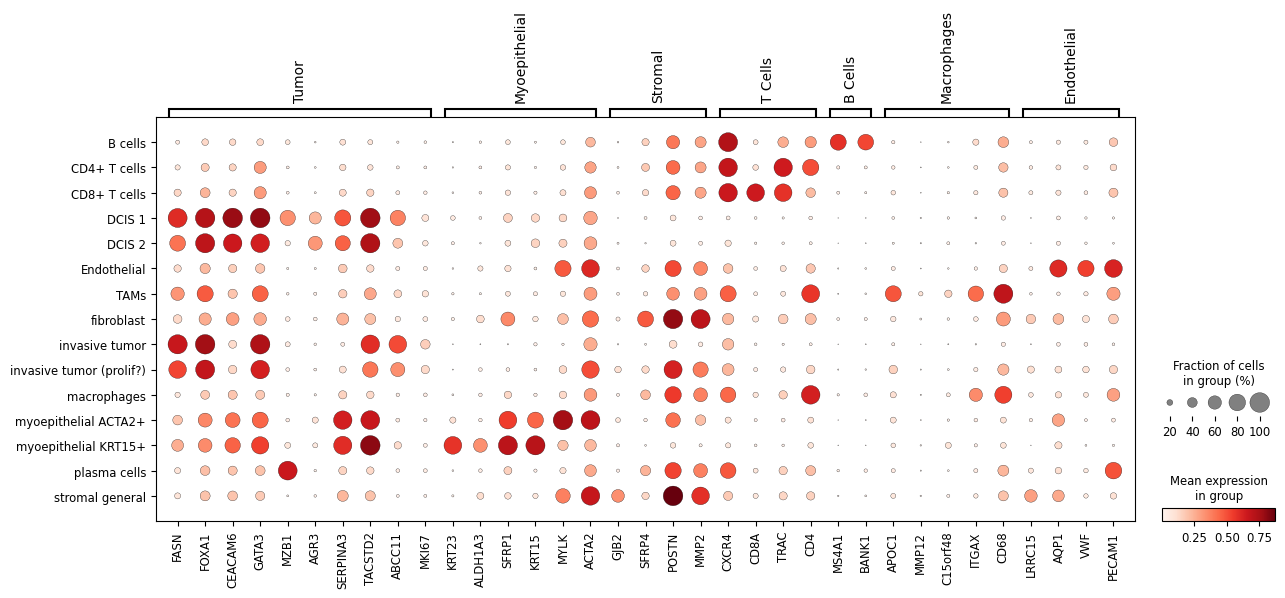

In [8]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    var_names=var_names,
    dendrogram=False,
    groups=["DCIS 1", "DCIS 2", "invasive tumor", "CD8+ T cells"],
)

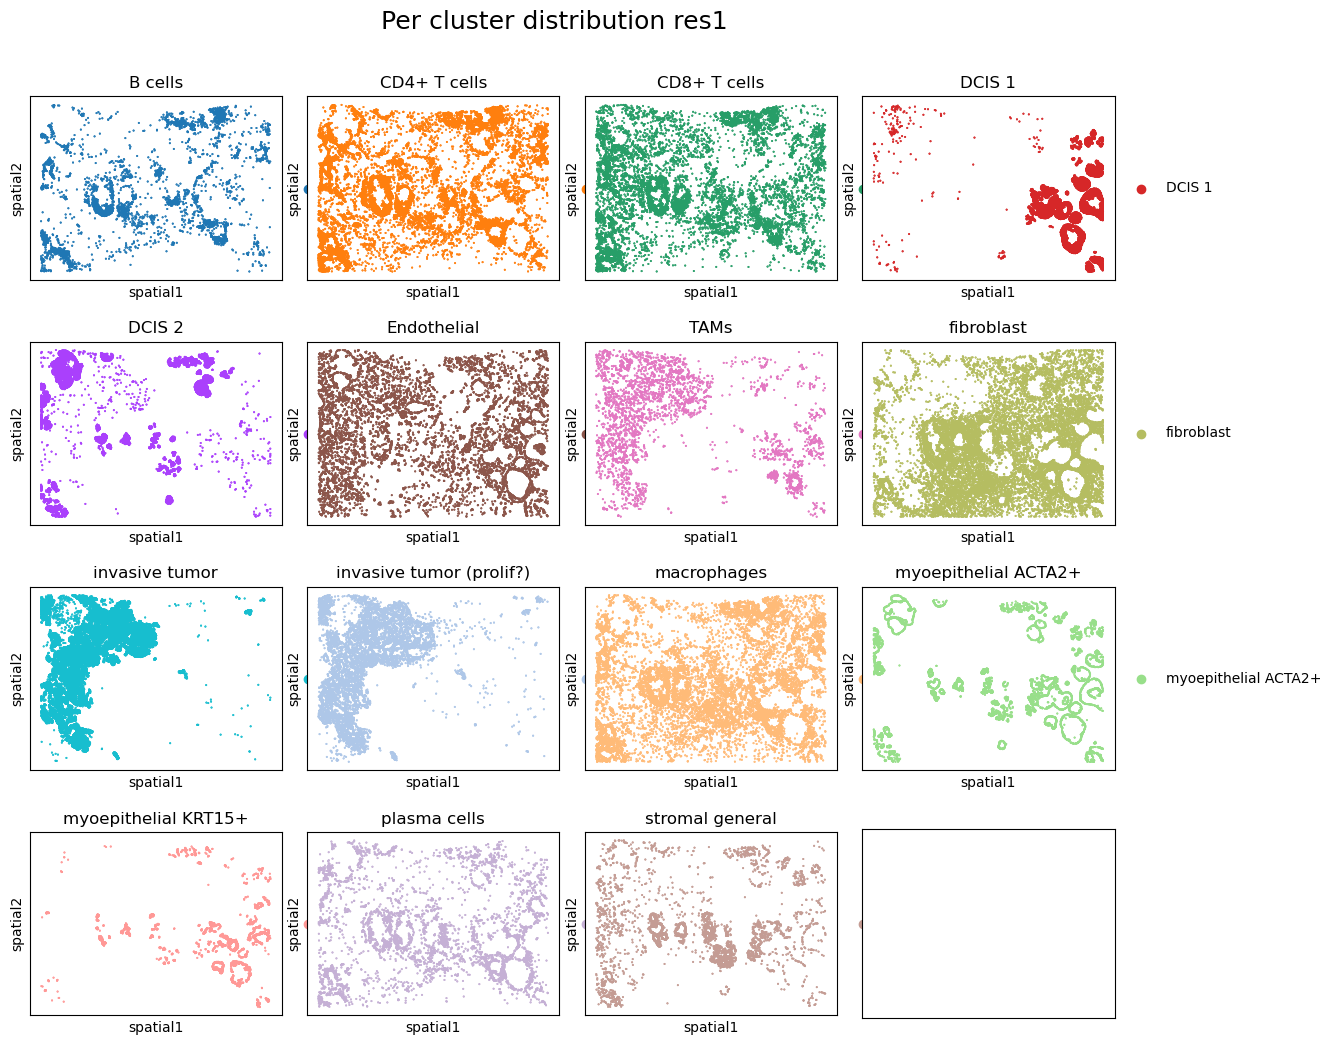

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 12), sharex='all', sharey='all')
plt.subplots_adjust(hspace=0.3, wspace=0.1)
fig.suptitle("Per cluster distribution res1", fontsize=18, y = .95)
clusters = adata.obs['cell_type_ref'].sort_values().unique()

for cluster, ax in zip(clusters, axs.ravel()):

    sq.pl.spatial_scatter(
        adata,
        library_id="spatial",
        shape=None,
        color="cell_type_ref",
        groups=cluster,
        wspace=0.1,
        title=cluster,
        axis_label=None,
        ax=ax,
    )

### Write final h5ad file

In [27]:
outdir = '/home/avpong/projects/xenium_breast_cancer/data'
bt.io.write_h5ad(adata, filename=f'{outdir}/xenium_breast_final_celltype_update.h5ad')

